## Springboard Capstone Project 1
### Inferential Statistics
#### We begin by importing the prepared dataset prepared earlier and necessary python modules.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy.stats import t


In [2]:
df = pd.read_csv('nhanes.csv')
df['new_cvd'] = df['cvd_onset_age'] == df['age']


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df['readmission'] = df['numhosp'] > 1
df.head()


,seqn,numhosp,age,gender,ethnicity,lang_hisp,lang_nhb_nhw,lang_asian,foodsec,depr1,depr2,depr3,depr4,depr5,depr6,depr7,depr8,depr9,depr10,depr_score,diabetes,diabetes_age,prediabetes,chf,chf_age,chd,chd_age,angina,angina_age,heartattack,heartattack_age,stroke,stroke_age,cvd_onset_age,fglucose,hdl,tg,ldl,tchol,hgba1c,bmi,bodyfatpct,wbc,lymphocytes,monocytes,neutrophils,eosinophil,basophils,rbc,hgb,hct,mcv,mch,mchgb,rdw,plt,mpv,alb,alp,ast,alt,bun,bicarbonate,calcium,cholesterol,cpk,chlorine,creatinine,globulin,glucose,ggt,iron,potassium,ldh,sodium,osmolality,phosphorus,tbili,protein,triglycerides,uricacid,new_cvd,readmission
0,83732.0,NaN,62.0,0.0,white,NaN,1.0,NaN,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,46.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,46.0,NaN,NaN,173.0,7.0,27.8,NaN,9.8,23.9,8.2,63.5,4.0,0.5,4.93,15.2,44.7,90.8,30.8,34.0,13.9,181.0,8.3,4.6,52.0,21.0,25.0,13.0,25.0,9.8,172.0,203.0,100.0,0.90,2.9,94.0,22.0,70.0,4.30,110.0,136.0,272.0,4.7,0.5,7.5,158.0,4.2,False,False
1,83733.0,NaN,53.0,0.0,white,NaN,NaN,NaN,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,101.0,63.0,147.0,173.0,265.0,5.5,30.8,30.0,7.3,31.3,9.7,54.8,2.6,1.8,4.89,17.5,49.7,101.8,35.8,35.1,13.4,170.0,9.6,4.5,47.0,31.0,35.0,10.0,27.0,9.8,267.0,91.0,103.0,1.05,2.9,94.0,75.0,161.0,4.55,108.0,140.0,278.0,4.4,0.6,7.4,170.0,7.0,False,False
2,83734.0,NaN,78.0,0.0,white,NaN,1.0,NaN,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,52.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,1.0,58.0,0.0,NaN,58.0,84.0,30.0,269.0,145.0,229.0,5.8,28.8,NaN,4.4,29.9,9.6,55.8,3.9,0.9,4.18,12.4,37.9,90.8,29.6,32.6,14.7,223.0,9.0,4.5,46.0,30.0,29.0,26.0,24.0,9.7,236.0,160.0,106.0,1.12,2.8,103.0,11.0,72.0,4.70,151.0,140.0,284.0,3.6,0.5,7.3,299.0,7.3,False,False
3,83735.0,NaN,56.0,1.0,white,NaN,1.0,NaN,3.0,1.0,1.0,2.0,2.0,1.0,3.0,2.0,0.0,1.0,0.0,13.0,0.0,NaN,1.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,61.0,NaN,NaN,174.0,5.6,42.4,50.9,6.1,17.1,10.3,68.7,3.1,0.9,4.54,12.8,40.1,88.3,28.2,31.9,13.1,280.0,9.1,3.8,65.0,23.0,26.0,13.0,24.0,8.9,179.0,66.0,106.0,0.96,2.3,63.0,19.0,43.0,4.08,172.0,141.0,279.0,3.8,0.3,6.1,93.0,5.4,False,False
4,83736.0,NaN,42.0,1.0,black,NaN,1.0,NaN,2.0,1.0,1.0,1.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,8.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,84.0,53.0,47.0,142.0,204.0,5.6,20.3,NaN,4.2,47.1,7.8,44.8,0.2,0.2,4.16,12.1,36.5,87.8,29.1,33.2,12.3,275.0,7.7,4.3,46.0,20.0,13.0,12.0,24.0,9.3,202.0,67.0,99.0,0.64,3.4,83.0,23.0,44.0,3.50,93.0,136.0,270.0,3.2,0.3,7.7,52.0,3.3,False,False


#### Step 2: Statistical Hypothesis Testing
<br>
Part 1: Categorical Variables <br>

Dependent Variable: <br>
'readmission'<br>

Independent target categorical variables:  <br>
- newcvd  <br>
- depr_score  <br>
- ethnicity <br>

#### Questions: 
In participants who have had at least 1 hospitalization, is there a statistically significant difference between the proportion of readmissions in the following target features/variables?

- Those with newcvd vs those without newcvd
- Those with a depression score < 5  vs. those with depression score >= 5. A depression score above 4 indicates mild depression. The higher the score, greater severity of depression is likely.
- Those with differing ethnicity will have a difference in proportion of readmissions.
Since 'readmission' is binary, one possible route of investigation splits the data into two subgroups (readmission ==1 and readmission ==0)  and tests whether the proportion of positive target values is statistically significantly different in the two groups by using statistical hypothesis testing.

Hypothesis # 1:

<center>H$_{0}$: p(readmission == 1 | newcvd == 1)   =   p(readmission == 1 | newcvd == 0)</center>
<br>  
      
<center>H$_{A}$: p(readmission == 1|newcvd == 1) > p(readmission == 1| newcvd == 0)</center>
<br>
<br>

Hypothesis # 2:
<center>H$_{0}$: p(readmission == 1 | depr_score > 5)   =   p(readmission == 1 | depr_score < 5)</center>
<br>  
      
<center>H$_{A}$: p(readmission == 1|depr_score > 5) > p(readmission == 1| depr_score < 5)</center>
<br>
<br>
Hypothesis # 3:

<center>H$_{0}$: p(readmission == 1 | ethnicity)  =   p(readmission == 0 | ethnicity)</center>
<br>  
      
<center>H$_{A}$: p(readmission == 1 | ethnicity)  !=  p(readmission == 0 | ethnicity)</center>
<br>
<br>
<br>






In [4]:
# Create updated dataframe which only contains NHANES participants with at least one hospital stay.
df_with_hosp=df[df['numhosp']>=1]
df_with_hosp.head()

,seqn,numhosp,age,gender,ethnicity,lang_hisp,lang_nhb_nhw,lang_asian,foodsec,depr1,depr2,depr3,depr4,depr5,depr6,depr7,depr8,depr9,depr10,depr_score,diabetes,diabetes_age,prediabetes,chf,chf_age,chd,chd_age,angina,angina_age,heartattack,heartattack_age,stroke,stroke_age,cvd_onset_age,fglucose,hdl,tg,ldl,tchol,hgba1c,bmi,bodyfatpct,wbc,lymphocytes,monocytes,neutrophils,eosinophil,basophils,rbc,hgb,hct,mcv,mch,mchgb,rdw,plt,mpv,alb,alp,ast,alt,bun,bicarbonate,calcium,cholesterol,cpk,chlorine,creatinine,globulin,glucose,ggt,iron,potassium,ldh,sodium,osmolality,phosphorus,tbili,protein,triglycerides,uricacid,new_cvd,readmission
9,83744.0,5.0,56.0,0.0,black,NaN,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,53.0,NaN,1.0,53.0,0.0,NaN,0.0,NaN,1.0,53.0,0.0,NaN,53.0,NaN,52.0,NaN,NaN,145.0,7.6,33.6,30.5,6.1,31.7,8.3,57.6,1.7,0.8,4.60,13.9,42.1,91.5,30.2,33.0,12.3,146.0,10.3,4.0,74.0,47.0,63.0,19.0,26.0,9.5,144.0,164.0,104.0,1.37,2.9,184.0,70.0,137.0,4.50,104.0,140.0,286.0,4.1,0.4,6.9,121.0,4.8,False,True
15,83757.0,4.0,57.0,1.0,other_hisp,more_eng_than_span,NaN,NaN,2.0,1.0,2.0,0.0,1.0,0.0,2.0,1.0,2.0,0.0,0.0,9.0,1.0,32.0,NaN,1.0,50.0,1.0,50.0,0.0,NaN,0.0,NaN,1.0,53.0,50.0,398.0,43.0,137.0,157.0,227.0,13.0,35.4,41.4,6.7,26.9,8.4,61.7,2.4,0.8,4.65,13.6,40.3,86.6,29.1,33.6,13.4,256.0,7.6,4.2,87.0,13.0,15.0,21.0,26.0,9.7,233.0,67.0,101.0,0.57,3.1,383.0,20.0,93.0,4.91,151.0,139.0,296.0,4.2,0.5,7.3,161.0,4.2,False,True
37,83802.0,1.0,29.0,1.0,mexican,english_only,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,71.0,NaN,NaN,199.0,5.2,23.7,NaN,7.5,38.4,7.8,50.3,3.2,0.4,4.21,13.1,37.8,89.7,31.1,34.7,12.8,260.0,8.9,4.9,90.0,20.0,14.0,15.0,23.0,9.2,203.0,109.0,101.0,0.61,3.2,94.0,14.0,54.0,3.89,122.0,137.0,274.0,4.3,0.5,8.1,59.0,5.4,False,False
44,83818.0,1.0,80.0,1.0,other_hisp,spanish_only,NaN,NaN,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,NaN,1.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,119.0,40.0,139.0,40.0,108.0,6.1,28.5,NaN,7.2,40.5,9.1,47.6,2.2,0.7,4.07,12.8,38.3,94.2,31.6,33.5,13.2,224.0,7.6,4.0,62.0,27.0,20.0,23.0,27.0,9.2,102.0,70.0,105.0,1.29,2.7,119.0,14.0,71.0,3.66,143.0,142.0,287.0,3.5,0.6,6.7,148.0,4.3,False,False
57,83843.0,1.0,80.0,0.0,white,NaN,1.0,NaN,3.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,24.2,NaN,8.5,19.7,9.0,67.7,2.9,0.8,4.14,13.8,39.9,96.3,33.3,34.6,14.6,213.0,6.3,4.4,NaN,NaN,NaN,15.0,28.0,9.5,NaN,NaN,96.0,1.04,2.7,93.0,NaN,NaN,3.64,134.0,133.0,267.0,3.5,NaN,7.1,16.0,NaN,False,False


In [5]:
#Next, split the data with criterion new_cvd ==0 vs new_cvd == 1:

group_a = df_with_hosp.loc[df_with_hosp['new_cvd']== 0]
group_b = df_with_hosp.loc[df_with_hosp['new_cvd'] == 1]


# the 2 groups have the following sample sizes:
n_a = len(group_a)
n_b = len(group_b)

n_a, n_b


(632, 38)

In [6]:
# Calculate the proportion of positive target values (readmissions) in group_a and group_b

p_a = group_a.loc[df_with_hosp['readmission']==1].shape[0]/group_a.shape[0] #proportion of participants without newcvd with readmissions
p_b = group_b.loc[df_with_hosp['readmission']==1].shape[0]/group_b.shape[0] #proportion of new onset cvd readmitted

p_a, p_b


(0.30063291139240506, 0.3684210526315789)

In [7]:

# perform a simple, two-proportion z-test (one-tailed) to examine if the difference between readmissions in the 2 groups is significant:
import scipy.stats as stats

p = (p_a * n_a + p_b * n_b)/(n_a + n_b)
SE = np.sqrt(p*(1 - p)*(1/n_a + 1/n_b))
z_score = (p_a - p_b)/SE

p_value = stats.norm.sf(abs(z_score))
p_value

0.18890771215727786

There is a not a significant difference between hospital readmissions of participants who had positive newcvd when compared with those with negative newcvd. (p=0.19)

In [8]:
#Next, split the data with criterion depr_score <5 vs depr_score >=5:

group_c = df_with_hosp.loc[df_with_hosp['depr_score'] < 5]
group_d = df_with_hosp.loc[df_with_hosp['depr_score'] >= 5]


# the 2 groups have the following sample sizes:
n_c = len(group_c)
n_d = len(group_d)

n_c, n_d


(222, 221)

In [9]:
# Calculate the proportion of positive target values (readmissions) in group_c and group_d

p_c = group_c.loc[df_with_hosp['readmission']==1].shape[0]/group_c.shape[0] #proportion of participants with depr_score <5 with readmissions
p_d = group_d.loc[df_with_hosp['readmission']==1].shape[0]/group_d.shape[0] #proportion of participants with depr_score >=5 with readmission

p_c, p_d


(0.28378378378378377, 0.3665158371040724)

In [10]:

# perform a two-proportion z-test (one-tailed) to determine if the difference between readmissions in the 2 groups is significant:
import scipy.stats as stats

p = (p_c * n_c + p_d * n_d)/(n_c + n_d)
SE = np.sqrt(p*(1 - p)*(1/n_c + 1/n_d))
z_score = (p_c - p_d)/SE

p_value = stats.norm.sf(abs(z_score))
p_value



0.0315281145217061

Based on the two-proportion z-test, those with depr_score>5 had a higher proportion of hospital readmissions when compared with those with depr_score<5. (p=0.03)

In [11]:
#Another test for testing dependency between 2 categorical variables is the chi-squared test.
#First we  build a contingency table between two variables, for example 'readmission' and 'new_cvd':
pd.crosstab(df_with_hosp['readmission'],df_with_hosp['new_cvd'])




new_cvd,False,True
readmission,,
False,442,24
True,190,14


In [12]:

# Example of the Chi-Squared Test
from scipy.stats import chi2_contingency
table = pd.crosstab(df_with_hosp['readmission'],df_with_hosp['new_cvd'])
stat, p, dof, expected = chi2_contingency(table)
print('Chi-squared stat=%.3f, p=%.3f' % (stat, p))
if p <0.05:
    print('Based on the p-value, we reject the null hypothesis')
else:
    print('Based on the pvalue, we fail to reject the null hypothesis.')


Chi-squared stat=0.491, p=0.484
Based on the pvalue, we fail to reject the null hypothesis.


In support of the z-test, the Chi-Squared Test reveals no association between an increased number of hospital readmissions and new onset CVD. (p>0.05)

In [13]:
table = pd.crosstab(df_with_hosp['readmission'],df_with_hosp['depr_score'] > 5)
table

depr_score,False,True
readmission,,
False,354,112
True,131,73


In [14]:

# Example of the Chi-Squared Test
from scipy.stats import chi2_contingency
table = pd.crosstab(df_with_hosp['readmission'],df_with_hosp['depr_score'] > 5)
stat, p, dof, expected = chi2_contingency(table)
print('Chi-squared stat=%.3f, p=%.3f' % (stat, p))
if p <0.05:
    print('Based on the p-value, we reject the null hypothesis')
else:
    print('Based on the pvalue, we fail to reject the null hypothesis.')




Chi-squared stat=9.222, p=0.002
Based on the p-value, we reject the null hypothesis


In support of the z-test, the Chi-Squared Test reveals that those with depr_score>5 (mild depression or worse) had a higher proportion of hospital readmissions when compared with those with depr_score<5 (minimal or no depression). (p<0.05)

In [15]:
table2 = pd.crosstab(df_with_hosp['readmission'],df_with_hosp['ethnicity'])
table2

ethnicity,asian,black,mexican,other_hisp,other_race_or_multiracial,white
readmission,,,,,,
False,42,118,76,65,23,142
True,13,55,29,30,15,62


In [16]:

# Example of the Chi-Squared Test
from scipy.stats import chi2_contingency
table2 = pd.crosstab(df_with_hosp['readmission'],df_with_hosp['ethnicity'])
stat, p, dof, expected = chi2_contingency(table2)
print('Chi-squared stat=%.3f, p=%.3f' % (stat, p))
if p <0.05:
    print('Based on the p-value, we reject the null hypothesis')
else:
    print('Based on the pvalue, we fail to reject the null hypothesis.')


Chi-squared stat=3.269, p=0.659
Based on the pvalue, we fail to reject the null hypothesis.


#### Step 2: Statistical Hypothesis Testing

Part 2: Continuous Variables <br>

Dependent Variable: <br>
'readmission'<br>

Independent target continous variables:  <br>
- various laboratory test values  <br>
- age  <br>
- depr_score <br>

#### Questions: 
In participants who had at least 1 hospitalization, is there a statistically significant difference in mean values of the following target features/variables?

- laboratory data (all)
- depr_score
- age

Since 'readmission' is binary, one possible route of investigation splits the data into two subgroups (readmission ==1 and readmission ==0)  and tests whether the mean of the target feature/variable is statistically significantly different in the two groups. 

Hypothesis # 1 (example using one of the laboratory test values):

<center>H$_{0}$: fglucose.mean() | readmission==1    =   fglucose.mean() | readmission == 0 </center>
<br>  
      
<center>H$_{0}$: fglucose.mean() | readmission==1    !=   fglucose.mean() | readmission == 0 </center>
<br>
<br>

Hypothesis # 2:
<center>H$_{0}$: depr_score.mean() | readmission==1    =   depr_score.mean() | readmission == 0 </center>
<br>  
      
<center>H$_{A}$: depr_score.mean() | readmission == 1  >  depr_score.mean() | readmission == 0</center>
<br>
<br>
Hypothesis # 3:

<center>H$_{A}$: age.mean() | readmission == 1  =  age.mean() | readmission == 0</center>
<br>  
      
<center>H$_{A}$: age.mean() | readmission == 1  !=  age.mean() | readmission == 0</center>
<br>
<br>
<br>






We are interested in examining the relationship between laboratory values and positive or negative readmission. 
First, we remove or replace any null values for our continous laboratory values:

In [19]:
all_labs = df_with_hosp[['fglucose', 'hdl','tg', 'ldl', \
               'tchol','hgba1c','bmi', 'bodyfatpct',  'wbc', 'lymphocytes', 'monocytes', 'neutrophils', 'eosinophil',\
               'basophils', 'rbc', 'hgb', 'hct', 'mcv', 'mch', 'mchgb', 'rdw', 'plt', 'mpv', 'alb', 'alp', 'ast', \
               'alt', 'bun','bicarbonate', 'calcium', 'cholesterol', 'cpk', 'chlorine', 'creatinine', 'globulin', 'glucose',\
               'ggt', 'iron','potassium', 'ldh', 'sodium', 'osmolality', 'phosphorus', 'tbili', 'protein', 'triglycerides',\
               'uricacid']]
all_labs = all_labs.fillna(all_labs.median())
df_with_hosp[['fglucose', 'hdl','tg', 'ldl', \
               'tchol','hgba1c','bmi', 'bodyfatpct',  'wbc', 'lymphocytes', 'monocytes', 'neutrophils', 'eosinophil',\
               'basophils', 'rbc', 'hgb', 'hct', 'mcv', 'mch', 'mchgb', 'rdw', 'plt', 'mpv', 'alb', 'alp', 'ast', \
               'alt', 'bun','bicarbonate', 'calcium', 'cholesterol', 'cpk', 'chlorine', 'creatinine', 'globulin', 'glucose',\
               'ggt', 'iron','potassium', 'ldh', 'sodium', 'osmolality', 'phosphorus', 'tbili', 'protein', 'triglycerides',\
               'uricacid']] = df_with_hosp[['fglucose', 'hdl','tg', 'ldl', \
               'tchol','hgba1c','bmi', 'bodyfatpct',  'wbc', 'lymphocytes', 'monocytes', 'neutrophils', 'eosinophil',\
               'basophils', 'rbc', 'hgb', 'hct', 'mcv', 'mch', 'mchgb', 'rdw', 'plt', 'mpv', 'alb', 'alp', 'ast', \
               'alt', 'bun','bicarbonate', 'calcium', 'cholesterol', 'cpk', 'chlorine', 'creatinine', 'globulin', 'glucose',\
               'ggt', 'iron','potassium', 'ldh', 'sodium', 'osmolality', 'phosphorus', 'tbili', 'protein', 'triglycerides',\
               'uricacid']].fillna(all_labs.median())
df_with_hosp.isna().sum()

seqn                 0
numhosp              0
age                  0
gender               0
ethnicity            0
lang_hisp          471
lang_nhb_nhw       264
lang_asian         615
foodsec             26
depr1              107
depr2              106
depr3              107
depr4              106
depr5              106
depr6              106
depr7              106
depr8              106
depr9              106
depr10             226
depr_score         227
diabetes             1
diabetes_age       506
prediabetes        175
chf                 18
chf_age            594
chd                 19
chd_age            600
angina              18
angina_age         634
heartattack         18
heartattack_age    597
stroke              18
stroke_age         613
cvd_onset_age      495
fglucose             0
hdl                  0
tg                   0
ldl                  0
tchol                0
hgba1c               0
bmi                  0
bodyfatpct           0
wbc                  0
lymphocytes

#### Comparing means of laboratory values for between group 0 (negative readmissions) and group 1 (positive readmissions)

A 2-sided t-test  will allow us to to compare the means of each of various laboratory values between the two groups of interest (readmission == 1 and readmission == 0).

scipy.stats.ttest_ind allows us to calculate the t-test for the means of two independent samples of scores.
This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.


In [20]:
group_0 = df_with_hosp.loc[df_with_hosp['readmission'] == 0]
group_1 = df_with_hosp.loc[df_with_hosp['readmission'] == 1]

lab = 'fglucose'
print('Results of t-test for ', lab, ': ')
print(stats.ttest_ind(group_0[lab], group_1[lab]))

if p <0.05:
    print('Based on the p-value, we reject the null hypothesis')
else:
    print('Based on the pvalue, we fail to reject the null hypothesis.')


Results of t-test for  fglucose : 
Ttest_indResult(statistic=-1.3072794183033443, pvalue=0.19156761907741807)
Based on the pvalue, we fail to reject the null hypothesis.


In [21]:
group_0 = df_with_hosp.loc[df_with_hosp['readmission'] == 0]
group_1 = df_with_hosp.loc[df_with_hosp['readmission'] == 1]

lab = 'hgb'
print('Results of t-test for ', lab, ': ')
statistics, p = stats.ttest_ind(group_0[lab], group_1[lab])
print(statistics, p)
if p <0.05:
    print('Based on the p-value, we reject the null hypothesis')
else:
    print('Based on the pvalue, we fail to reject the null hypothesis.')


Results of t-test for  hgb : 
1.9420007500049057 0.05255703604304638
Based on the pvalue, we fail to reject the null hypothesis.


Note the above result for hgb(hemoglobin); if rounded down, p=0.05, which would signify possible dependence.

In [22]:
group_0 = df_with_hosp.loc[df_with_hosp['readmission'] == 0]
group_1 = df_with_hosp.loc[df_with_hosp['readmission'] == 1]

lab = 'hct'
print('Results of t-test for ', lab, ': ')
statistics, p = stats.ttest_ind(group_0[lab], group_1[lab])
print(statistics, p)
if p <0.05:
    print('Based on the p-value, we reject the null hypothesis')
else:
    print('Based on the pvalue, we fail to reject the null hypothesis.')

Results of t-test for  hct : 
1.27434332769613 0.20298490292930402
Based on the pvalue, we fail to reject the null hypothesis.


In [23]:
group_0 = df_with_hosp.loc[df_with_hosp['readmission'] == 0]
group_1 = df_with_hosp.loc[df_with_hosp['readmission'] == 1]

lab = 'age'
print('Results of t-test for ', lab, ': ')
statistics, p = stats.ttest_ind(group_0[lab], group_1[lab])
print(statistics, p)
if p <0.05:
    print('Based on the p-value, we reject the null hypothesis')
else:
    print('Based on the pvalue, we fail to reject the null hypothesis.')

Results of t-test for  age : 
-1.8258865429288056 0.06831362421597259
Based on the pvalue, we fail to reject the null hypothesis.


In [24]:
group_0 = df_with_hosp.loc[df_with_hosp['readmission'] == 0]
group_1 = df_with_hosp.loc[df_with_hosp['readmission'] == 1]

lab = 'sodium'
print('Results of t-test for ', lab, ': ')
statistics, p = stats.ttest_ind(group_0[lab], group_1[lab])
print(statistics, p)
if p <0.05:
    print('Based on the p-value, we reject the null hypothesis')
else:
    print('Based on the pvalue, we fail to reject the null hypothesis.')

Results of t-test for  sodium : 
-1.3000652858414905 0.19402699038046828
Based on the pvalue, we fail to reject the null hypothesis.


In [25]:
group_0 = df_with_hosp.loc[df_with_hosp['readmission'] == 0]
group_1 = df_with_hosp.loc[df_with_hosp['readmission'] == 1]

lab = 'bun'
print('Results of t-test for ', lab, ': ')
statistics, p = stats.ttest_ind(group_0[lab], group_1[lab])
print(statistics, p)
if p <0.05:
    print('Based on the p-value, we reject the null hypothesis')
else:
    print('Based on the pvalue, we fail to reject the null hypothesis.')

Results of t-test for  bun : 
-3.3574674755796146 0.0008312260912752622
Based on the p-value, we reject the null hypothesis


In [26]:
group_0 = df_with_hosp.loc[df_with_hosp['readmission'] == 0]
group_1 = df_with_hosp.loc[df_with_hosp['readmission'] == 1]

lab = 'creatinine'
print('Results of t-test for ', lab, ': ')
statistics, p = stats.ttest_ind(group_0[lab], group_1[lab])
print(statistics, p)
if p <0.05:
    print('Based on the p-value, we reject the null hypothesis')
else:
    print('Based on the pvalue, we fail to reject the null hypothesis.')

Results of t-test for  creatinine : 
-2.5101182161871542 0.012304363542253765
Based on the p-value, we reject the null hypothesis


In [27]:
group_0 = df_with_hosp.loc[df_with_hosp['readmission'] == 0]
group_1 = df_with_hosp.loc[df_with_hosp['readmission'] == 1]

lab = 'tchol'
print('Results of t-test for ', lab, ': ')
statistics, p = stats.ttest_ind(group_0[lab], group_1[lab])
print(statistics, p)
if p <0.05:
    print('Based on the p-value, we reject the null hypothesis')
else:
    print('Based on the pvalue, we fail to reject the null hypothesis.')

Results of t-test for  tchol : 
1.9203953013395971 0.05523343528564761
Based on the pvalue, we fail to reject the null hypothesis.


In [28]:
group_0 = df_with_hosp.loc[df_with_hosp['readmission'] == 0]
group_1 = df_with_hosp.loc[df_with_hosp['readmission'] == 1]

lab = 'ldl'
print('Results of t-test for ', lab, ': ')
statistics, p = stats.ttest_ind(group_0[lab], group_1[lab])
print(statistics, p)
if p <0.05:
    print('Based on the p-value, we reject the null hypothesis')
else:
    print('Based on the pvalue, we fail to reject the null hypothesis.')


Results of t-test for  ldl : 
0.799050517841068 0.42454513294537577
Based on the pvalue, we fail to reject the null hypothesis.


In [29]:
group_0 = df_with_hosp.loc[df_with_hosp['readmission'] == 0]
group_1 = df_with_hosp.loc[df_with_hosp['readmission'] == 1]

lab = 'bmi'
print('Results of t-test for ', lab, ': ')
statistics, p = stats.ttest_ind(group_0[lab], group_1[lab])
print(statistics, p)
if p <0.05:
    print('Based on the p-value, we reject the null hypothesis')
else:
    print('Based on the pvalue, we fail to reject the null hypothesis.')

Results of t-test for  bmi : 
-0.7521402928497236 0.4522316314650312
Based on the pvalue, we fail to reject the null hypothesis.


In [30]:
group_0 = df_with_hosp.loc[df_with_hosp['readmission'] == 0]
group_1 = df_with_hosp.loc[df_with_hosp['readmission'] == 1]

lab = 'osmolality'
print('Results of t-test for ', lab, ': ')
statistics, p = stats.ttest_ind(group_0[lab], group_1[lab], equal_var=False)
print(statistics, p)
if p <0.05:
    print('Based on the p-value, we reject the null hypothesis')
else:
    print('Based on the pvalue, we fail to reject the null hypothesis.')

Results of t-test for  osmolality : 
-2.7068913688434124 0.007142078042165046
Based on the p-value, we reject the null hypothesis


#### Permutation test to simulate repeated draws of laboratory values

Next we will look for significant differences between the 2 groups' lab value means using bootstrapping.

In [31]:
group_0_mean = round(np.mean(group_0.bun))
group_1_shifted = group_1.bun - np.mean(group_1.bun) + group_0_mean

def diff_from_group_0(data, group_0_mean=group_0_mean):
    return(np.mean(data)- group_0_mean)
diff_observed = diff_from_group_0(group_1.bun)

np.random.seed(47)
def bs_replicates_1d(data, func):
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)
print(bs_replicates_1d(group_0.bun, np.mean))

def draw_bs_replicates(data, func, size=10000):
    """Draw bootstrap replicates."""
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bs_replicates_1d(data, func)
    return bs_replicates

bs_replicates = draw_bs_replicates(group_1_shifted, diff_from_group_0, 10000)
pvalue = np.sum(bs_replicates <= diff_observed)/10000
print('The p-value of the observed differences between negative readmission group and positive readmission group is ', pvalue)
if pvalue <0.05:
    print('Based on the p-value, we reject the null hypothesis')
else:
    print('Based on the pvalue, we fail to reject the null hypothesis.')

15.50214592274678
The p-value of the observed differences between negative readmission group and positive readmission group is  0.9918
Based on the pvalue, we fail to reject the null hypothesis.


In [32]:
group_0_mean = round(np.mean(group_0.creatinine))
group_1_shifted = group_1.creatinine - np.mean(group_1.creatinine) + group_0_mean

def diff_from_group_0(data, group_0_mean=group_0_mean):
    return(np.mean(data)- group_0_mean)
diff_observed = diff_from_group_0(group_1.creatinine)

np.random.seed(47)
def bs_replicates_1d(data, func):
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)
print(bs_replicates_1d(group_0.creatinine, np.mean))

def draw_bs_replicates(data, func, size=10000):
    """Draw bootstrap replicates."""
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bs_replicates_1d(data, func)
    return bs_replicates

bs_replicates = draw_bs_replicates(group_1_shifted, diff_from_group_0, 10000)
pvalue = np.sum(bs_replicates <= diff_observed)/10000
print('The p-value of the observed differences between negative readmission group and positive readmission group is ', pvalue)
if pvalue <0.05:
    print('Based on the p-value, we reject the null hypothesis')
else:
    print('Based on the pvalue, we fail to reject the null hypothesis.')

0.9446781115879829
The p-value of the observed differences between negative readmission group and positive readmission group is  0.8958
Based on the pvalue, we fail to reject the null hypothesis.


#### More with Continous Variables

Lastly,we examined correlation between laboratory values.
First, isolate the variables of interest, then create a a correlation matrix. 


In [33]:
labs = df_with_hosp[['fglucose', 'hdl','tg', 'ldl', 'tchol','hgba1c','bmi', 'bodyfatpct','rbc', 'hgb', 'hct', 'mcv', 'mch',\
               'mchgb', 'rdw', 'plt', 'mpv', 'alb', 'alp', 'ast', 'alt', 'bun','bicarbonate', 'calcium', 'cholesterol',\
               'cpk', 'chlorine', 'creatinine', 'globulin', 'glucose', 'ggt', 'iron','potassium', 'ldh', 'sodium',\
               'osmolality', 'phosphorus', 'tbili', 'protein', 'triglycerides', 'uricacid']]

corr_matrix = labs.corr(method='pearson')
corr_matrix

,fglucose,hdl,tg,ldl,tchol,hgba1c,bmi,bodyfatpct,rbc,hgb,hct,mcv,mch,mchgb,rdw,plt,mpv,alb,alp,ast,alt,bun,bicarbonate,calcium,cholesterol,cpk,chlorine,creatinine,globulin,glucose,ggt,iron,potassium,ldh,sodium,osmolality,phosphorus,tbili,protein,triglycerides,uricacid
fglucose,1.000000,-0.073550,0.255385,-0.078137,-0.013468,0.603718,0.055683,0.040487,0.089492,0.070489,0.073072,-0.021920,-0.012417,0.020615,-0.002706,-0.054290,0.068137,-0.076594,0.046631,-0.039201,-0.008885,0.071179,0.099451,0.054982,-0.012289,-0.003299,-0.176005,0.009852,0.061227,0.616309,0.004181,-0.012790,0.180180,-0.028861,-0.081218,0.257173,-0.053794,0.048592,0.001679,0.117686,-0.027659
hdl,-0.073550,1.000000,-0.099146,0.007396,0.251554,-0.102897,-0.200649,-0.055491,-0.137420,-0.119401,-0.103978,0.058353,0.014470,-0.092855,-0.001375,-0.068442,-0.057242,0.053636,-0.005826,-0.038231,-0.083972,0.015054,0.080554,0.128948,0.248803,-0.029766,-0.090634,-0.011409,-0.102887,-0.140324,0.054098,0.051220,-0.106722,0.144582,0.031857,-0.043648,0.097676,0.019964,-0.070523,-0.318983,-0.105189
tg,0.255385,-0.099146,1.000000,0.067102,0.276041,0.220537,0.041007,-0.004197,0.105360,0.132765,0.115475,0.010103,0.042288,0.107990,-0.031226,-0.010283,0.099240,0.065100,0.031685,0.008181,0.057795,0.006817,0.010505,0.087767,0.273439,0.006916,-0.133300,-0.002877,-0.003634,0.136206,0.028376,0.025108,0.016574,0.043419,-0.076019,0.006454,-0.001088,0.014114,0.043221,0.587181,0.079072
ldl,-0.078137,0.007396,0.067102,1.000000,0.542942,-0.065303,-0.018410,0.001128,0.089329,0.058281,0.062527,-0.047588,-0.035296,0.013333,-0.037456,0.171517,-0.044299,0.058608,0.051557,-0.028302,-0.006799,-0.042955,0.031540,0.066976,0.549531,-0.057694,0.027132,-0.052341,0.015360,-0.061946,0.009595,0.018613,-0.008400,-0.029833,0.049493,-0.012429,0.122787,-0.090317,0.060691,0.043657,-0.004808
tchol,-0.013468,0.251554,0.276041,0.542942,1.000000,0.042051,-0.015136,0.033682,0.100161,0.117952,0.105781,0.003426,0.031439,0.092026,-0.059910,0.108062,-0.012414,0.108814,0.060995,-0.029817,0.042256,-0.018061,0.079464,0.179711,0.992017,-0.048457,-0.112449,-0.045141,-0.031852,0.017378,0.071819,0.071232,-0.064382,0.080602,-0.009304,-0.013373,0.146487,-0.082362,0.043497,0.426235,0.013976
hgba1c,0.603718,-0.102897,0.220537,-0.065303,0.042051,1.000000,0.159753,0.030808,0.058818,-0.009613,0.005582,-0.072705,-0.078764,-0.051802,0.050380,-0.014228,0.105499,-0.123490,0.101016,0.005368,0.055527,0.159283,0.126833,0.092387,0.042059,0.051705,-0.292868,0.058996,0.160685,0.759664,0.047603,-0.051409,0.194687,0.115005,-0.198686,0.279955,-0.039495,-0.027131,0.070899,0.260629,0.092613
bmi,0.055683,-0.200649,0.041007,-0.018410,-0.015136,0.159753,1.000000,0.319584,0.148879,0.053912,0.069061,-0.126422,-0.115094,-0.032311,0.106552,0.050247,0.146062,-0.186335,0.072689,0.016555,0.048534,-0.007465,0.013309,-0.073679,-0.014733,0.094634,-0.020619,-0.043567,0.103970,0.142607,-0.001408,-0.133618,0.008129,0.129512,-0.024913,0.045170,-0.106637,-0.104489,-0.040566,0.115220,0.254522
bodyfatpct,0.040487,-0.055491,-0.004197,0.001128,0.033682,0.030808,0.319584,1.000000,-0.118136,-0.135004,-0.142799,-0.039545,-0.036382,-0.011290,0.069998,0.093868,0.047508,-0.222163,0.072908,0.034789,0.008206,-0.019214,-0.052964,-0.129665,0.038838,-0.191813,0.045690,-0.092830,0.128165,0.001829,0.020890,-0.159455,-0.072724,0.026896,-0.001171,-0.005199,-0.046491,-0.140723,-0.035103,0.011060,-0.004128
rbc,0.089492,-0.137420,0.105360,0.089329,0.100161,0.058818,0.148879,-0.118136,1.000000,0.686196,0.770150,-0.378111,-0.315503,-0.039411,-0.065827,0.019143,0.118468,0.354578,-0.024080,-0.012434,0.132772,-0.237856,0.015627,0.237288,0.113245,0.132039,-0.048231,-0.224306,-0.136893,0.038597,-0.060332,0.136655,-0.024469,-0.096941,0.030683,-0.075870,-0.066895,-0.001730,0.122709,0.111726,0.093887
hgb,0.070489,-0.119401,0.132765,0.058281,0.117952,-0.009613,0.053912,-0.135004,0.686196,1.000000,0.972700,0.375001,0.465172,0.512634,-0.469765,-0.212391,0.054867,0.430849,-0.072793,-0.010093,0.141161,-0.

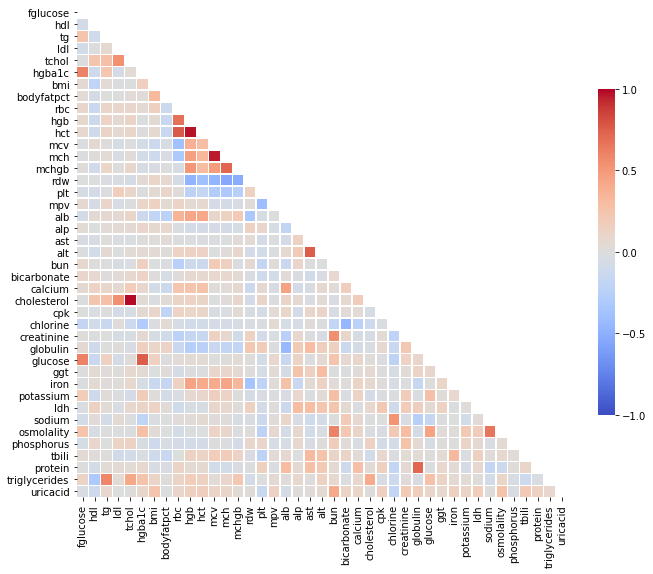

In [34]:

mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(11, 15))

heatmap = sns.heatmap(corr_matrix,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = False,
                      annot_kws = {'size': 12})

#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})


In [35]:
labs_reduced = df_with_hosp[['fglucose', 'ldl', 'tchol','hgba1c','rbc', 'hgb', 'hct', 'mcv', 'mch',\
               'mchgb', 'ast', 'alt', 'bun', 'chlorine', 'creatinine', 'globulin', 'sodium',\
               'osmolality', 'protein']]
corr_matrix_v2 = labs_reduced.corr(method='pearson')
corr_matrix_v2

,fglucose,ldl,tchol,hgba1c,rbc,hgb,hct,mcv,mch,mchgb,ast,alt,bun,chlorine,creatinine,globulin,sodium,osmolality,protein
fglucose,1.000000,-0.078137,-0.013468,0.603718,0.089492,0.070489,0.073072,-0.021920,-0.012417,0.020615,-0.039201,-0.008885,0.071179,-0.176005,0.009852,0.061227,-0.081218,0.257173,0.001679
ldl,-0.078137,1.000000,0.542942,-0.065303,0.089329,0.058281,0.062527,-0.047588,-0.035296,0.013333,-0.028302,-0.006799,-0.042955,0.027132,-0.052341,0.015360,0.049493,-0.012429,0.060691
tchol,-0.013468,0.542942,1.000000,0.042051,0.100161,0.117952,0.105781,0.003426,0.031439,0.092026,-0.029817,0.042256,-0.018061,-0.112449,-0.045141,-0.031852,-0.009304,-0.013373,0.043497
hgba1c,0.603718,-0.065303,0.042051,1.000000,0.058818,-0.009613,0.005582,-0.072705,-0.078764,-0.051802,0.005368,0.055527,0.159283,-0.292868,0.058996,0.160685,-0.198686,0.279955,0.070899
rbc,0.089492,0.089329,0.100161,0.058818,1.000000,0.686196,0.770150,-0.378111,-0.315503,-0.039411,-0.012434,0.132772,-0.237856,-0.048231,-0.224306,-0.136893,0.030683,-0.075870,0.122709
hgb,0.070489,0.058281,0.117952,-0.009613,0.686196,1.000000,0.972700,0.375001,0.465172,0.512634,-0.010093,0.141161,-0.119720,-0.088517,-0.161126,-0.261252,0.035441,-0.008591,0.051891
hct,0.073072,0.062527,0.105781,0.005582,0.770150,0.972700,1.000000,0.291399,0.328559,0.303003,-0.022271,0.130867,-0.125827,-0.087204,-0.152457,-0.239690,0.050280,-0.002792,0.067976
mcv,-0.021920,-0.047588,0.003426,-0.072705,-0.378111,0.375001,0.291399,1.000000,0.956837,0.491866,-0.015869,-0.002676,0.201388,-0.064131,0.139199,-0.143867,0.031178,0.129437,-0.083293
mch,-0.012417,-0.035296,0.031439,-0.078764,-0.315503,0.465172,0.328559,0.956837,1.000000,0.721358,-0.000027,0.027173,0.152280,-0.067932,0.076759,-0.178196,0.009758,0.093536,-0.080396
mchgb,0.020615,0.013333,0.092026,-0.051802,-0.039411,0.512634,0.303003,0.491866,0.721358,1.000000,0.038930,0.090238,-0.016248,-0.053977,-0.094089,-0.184517,-0.044317,-0.019619,-0.036383


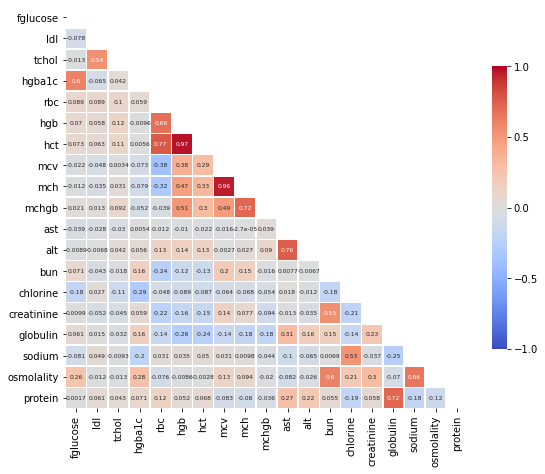

In [36]:

mask = np.zeros_like(corr_matrix_v2, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(9, 13))

heatmap = sns.heatmap(corr_matrix_v2,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 6})

#add the column names as labels
ax.set_yticklabels(corr_matrix_v2.columns, rotation = 0)
ax.set_xticklabels(corr_matrix_v2.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})


Text(0.5, 0.999, 'Positively correlated mean lab measurements')

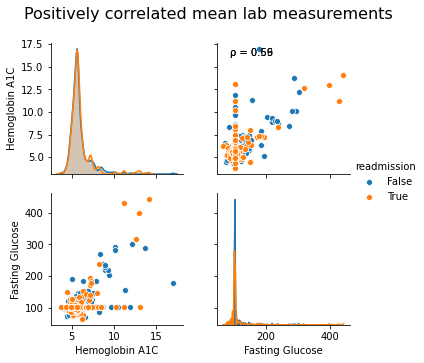

In [37]:
def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top right hand corner of a plot."""
    r, _ = stats.pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = '\u03C1'
    ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

pp = sns.pairplot(df_with_hosp, vars=['hgba1c', 'fglucose'], \
             hue='readmission', kind='scatter') 
pp.map_upper(corrfunc)

pp.axes[0,0].set_ylabel('Hemoglobin A1C')
pp.axes[1,0].set_ylabel('Fasting Glucose')

pp.axes[1,0].set_xlabel('Hemoglobin A1C')
pp.axes[1,1].set_xlabel('Fasting Glucose')

#plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle("Positively correlated mean lab measurements", fontsize=16, y=0.999)


Text(0.5, 0.999, 'Positively correlated mean lab measurements')

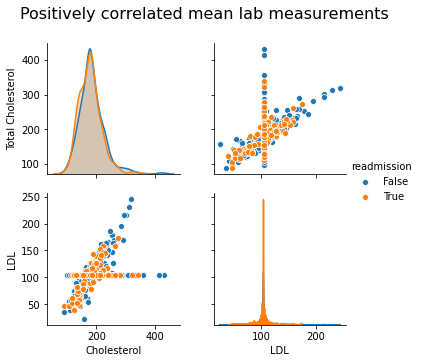

In [38]:
#def corrfunc(x,y, ax=None, **kws):
  #  """Plot the correlation coefficient in the top right hand corner of a plot."""
   # r, _ = stats.pearsonr(x, y)
    #ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    #rho = '\u03C1'
    #ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

pp = sns.pairplot(df_with_hosp, vars=['tchol', 'ldl'], \
             hue='readmission', kind='scatter') 
#pp.map_upper(corrfunc)

pp.axes[0,0].set_ylabel('Total Cholesterol')
pp.axes[1,0].set_ylabel('LDL')

pp.axes[1,0].set_xlabel('Cholesterol')
pp.axes[1,1].set_xlabel('LDL')

#plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle("Positively correlated mean lab measurements", fontsize=16, y=0.999)


Text(0.5, 0.999, 'Positively correlated mean lab measurements')

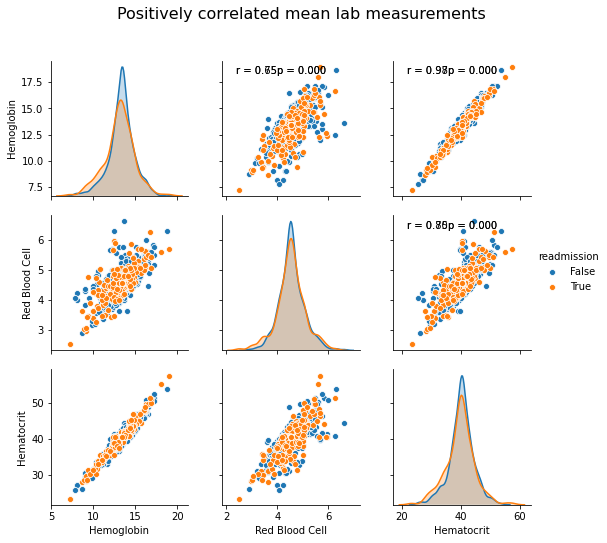

In [39]:
def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top right hand corner of a plot."""
    r, p = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f} ".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)
    ax.annotate("p = {:.3f}".format(p),
                xy=(.4, .9), xycoords=ax.transAxes)

pp = sns.pairplot(df_with_hosp, vars=['hgb', 'rbc', 'hct'], \
             hue='readmission', kind='scatter') 
pp.map_upper(corrfunc)

pp.axes[0,0].set_ylabel('Hemoglobin')
pp.axes[1,0].set_ylabel('Red Blood Cell')
pp.axes[2,0].set_ylabel('Hematocrit')

pp.axes[2,0].set_xlabel('Hemoglobin')
pp.axes[2,1].set_xlabel('Red Blood Cell')
pp.axes[2,2].set_xlabel('Hematocrit')
#plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle("Positively correlated mean lab measurements", fontsize=16, y=0.999)


Text(0.5, 0.999, 'Positively correlated mean lab measurements')

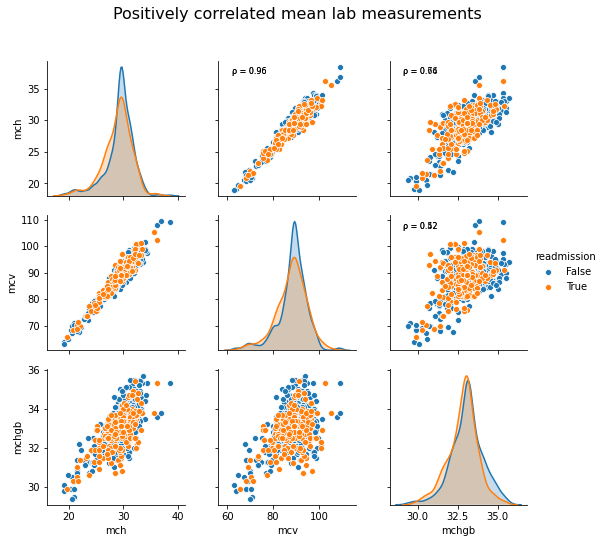

In [40]:
def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top right hand corner of a plot."""
    r, _ = stats.pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = '\u03C1'
    ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes, fontsize=8)

pp = sns.pairplot(df_with_hosp, vars=['mch', 'mcv', 'mchgb'], \
             hue='readmission', kind='scatter') 
pp.map_upper(corrfunc)

pp.axes[0,0].set_ylabel('mch')
pp.axes[1,0].set_ylabel('mcv')
pp.axes[2,0].set_ylabel('mchgb')

pp.axes[2,0].set_xlabel('mch')
pp.axes[2,1].set_xlabel('mcv')
pp.axes[2,2].set_xlabel('mchgb')
#plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle("Positively correlated mean lab measurements", fontsize=16, y=0.999)


Text(0.5, 0.999, 'Positively correlated mean lab measurements')

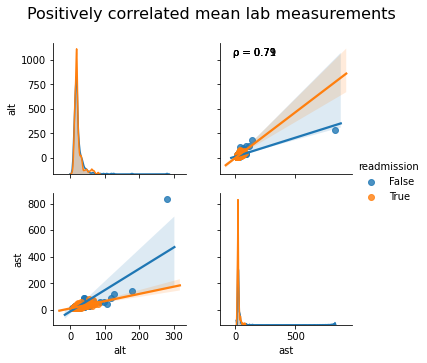

In [41]:
def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top right hand corner of a plot."""
    r, _ = stats.pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = '\u03C1'
    ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)


pp = sns.pairplot(df_with_hosp, vars=['alt', 'ast'],
             hue='readmission', kind='reg') 

pp.axes[0,0].set_ylabel('alt')
pp.axes[1,0].set_ylabel('ast')
pp.map_upper(corrfunc)

pp.axes[1,0].set_xlabel('alt')
pp.axes[1,1].set_xlabel('ast')
pp.map_upper(corrfunc)

#plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle("Positively correlated mean lab measurements", fontsize=16, y=0.999)


Text(0.5, 0.999, 'Positively correlated mean lab measurements')

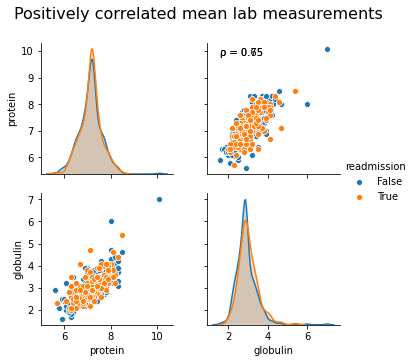

In [42]:
def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top right hand corner of a plot."""
    r, _ = stats.pearsonr(x, y)
    ax = ax or plt.gca()
     #Unicode for lowercase rho (ρ)
    rho = '\u03C1'
    ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

x= 'protein'
y= 'globulin'
pp = sns.pairplot(df_with_hosp, vars=[x, y],
             hue='readmission', kind='scatter') 
pp.map_upper(corrfunc)

pp.axes[0,0].set_ylabel('protein')
pp.axes[1,0].set_ylabel('globulin')

pp.axes[1,0].set_xlabel('protein')
pp.axes[1,1].set_xlabel('globulin')

#plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle("Positively correlated mean lab measurements", fontsize=16, y=0.999)


Text(0.5, 0.999, 'Positively correlated mean lab measurements')

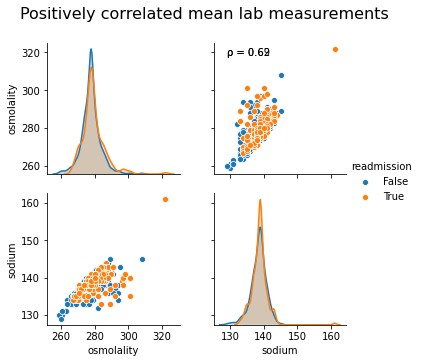

In [43]:
def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top right hand corner of a plot."""
    r, _ = stats.pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = '\u03C1'
    ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

pp = sns.pairplot(df_with_hosp, vars=['osmolality', 'sodium'],
             hue='readmission', kind='scatter') 
pp.map_upper(corrfunc)

pp.axes[0,0].set_ylabel('osmolality')
pp.axes[1,0].set_ylabel('sodium')

pp.axes[1,0].set_xlabel('osmolality')
pp.axes[1,1].set_xlabel('sodium')

#plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle("Positively correlated mean lab measurements", fontsize=16, y=0.999)


Age at readmission could possibly correlate with lab values for those in positive readmission group, when compared with negative readmissions. We check that below.


In [44]:


labs_age = df_with_hosp[['age','fglucose', 'ldl', 'tchol','hgba1c','rbc', 'hgb', 'hct', 'mcv', 'mch',\
               'mchgb', 'ast', 'alt', 'bun', 'chlorine', 'creatinine', 'globulin', 'sodium',\
               'osmolality', 'protein']]
corr_matrix_v3 = labs_age.corr(method='pearson')
corr_matrix_v3

,age,fglucose,ldl,tchol,hgba1c,rbc,hgb,hct,mcv,mch,mchgb,ast,alt,bun,chlorine,creatinine,globulin,sodium,osmolality,protein
age,1.000000,0.135069,-0.087520,-0.012618,0.244758,-0.181064,0.001833,-0.001466,0.278798,0.231324,0.027720,0.019863,-0.014061,0.374300,-0.197419,0.173780,-0.057243,0.051526,0.331897,-0.130089
fglucose,0.135069,1.000000,-0.078137,-0.013468,0.603718,0.089492,0.070489,0.073072,-0.021920,-0.012417,0.020615,-0.039201,-0.008885,0.071179,-0.176005,0.009852,0.061227,-0.081218,0.257173,0.001679
ldl,-0.087520,-0.078137,1.000000,0.542942,-0.065303,0.089329,0.058281,0.062527,-0.047588,-0.035296,0.013333,-0.028302,-0.006799,-0.042955,0.027132,-0.052341,0.015360,0.049493,-0.012429,0.060691
tchol,-0.012618,-0.013468,0.542942,1.000000,0.042051,0.100161,0.117952,0.105781,0.003426,0.031439,0.092026,-0.029817,0.042256,-0.018061,-0.112449,-0.045141,-0.031852,-0.009304,-0.013373,0.043497
hgba1c,0.244758,0.603718,-0.065303,0.042051,1.000000,0.058818,-0.009613,0.005582,-0.072705,-0.078764,-0.051802,0.005368,0.055527,0.159283,-0.292868,0.058996,0.160685,-0.198686,0.279955,0.070899
rbc,-0.181064,0.089492,0.089329,0.100161,0.058818,1.000000,0.686196,0.770150,-0.378111,-0.315503,-0.039411,-0.012434,0.132772,-0.237856,-0.048231,-0.224306,-0.136893,0.030683,-0.075870,0.122709
hgb,0.001833,0.070489,0.058281,0.117952,-0.009613,0.686196,1.000000,0.972700,0.375001,0.465172,0.512634,-0.010093,0.141161,-0.119720,-0.088517,-0.161126,-0.261252,0.035441,-0.008591,0.051891
hct,-0.001466,0.073072,0.062527,0.105781,0.005582,0.770150,0.972700,1.000000,0.291399,0.328559,0.303003,-0.022271,0.130867,-0.125827,-0.087204,-0.152457,-0.239690,0.050280,-0.002792,0.067976
mcv,0.278798,-0.021920,-0.047588,0.003426,-0.072705,-0.378111,0.375001,0.291399,1.000000,0.956837,0.491866,-0.015869,-0.002676,0.201388,-0.064131,0.139199,-0.143867,0.031178,0.129437,-0.083293
mch,0.231324,-0.012417,-0.035296,0.031439,-0.078764,-0.315503,0.465172,0.328559,0.956837,1.000000,0.721358,-0.000027,0.027173,0.152280,-0.067932,0.076759,-0.178196,0.009758,0.093536,-0.080396


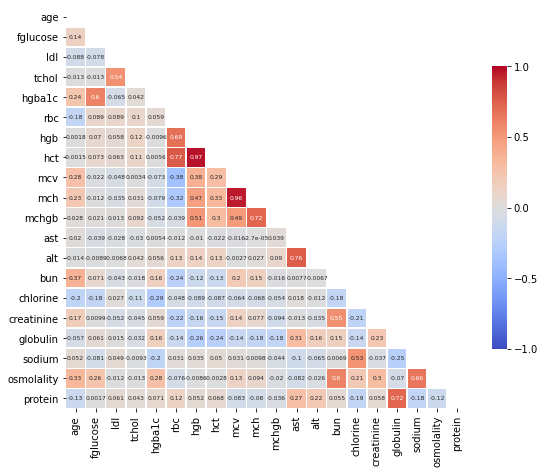

In [45]:

mask = np.zeros_like(corr_matrix_v3, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(9, 13))

heatmap = sns.heatmap(corr_matrix_v3,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 6})

#add the column names as labels
ax.set_yticklabels(corr_matrix_v3.columns, rotation = 0)
ax.set_xticklabels(corr_matrix_v3.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})


There doesn't appear to be correlation between age and any of the features. It may be interesting/helpful to delve further and examine whether a correlation may be found in positive readmission vs negative readmission groups.

Text(0.5, 0.999, 'Positively correlated mean lab measurements')

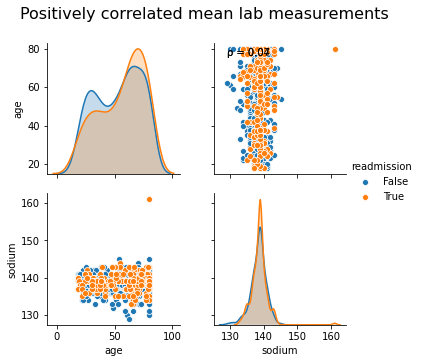

In [46]:
def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top right hand corner of a plot."""
    r, _ = stats.pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = '\u03C1'
    ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

pp = sns.pairplot(df_with_hosp, vars=['age', 'sodium'],
             hue='readmission', kind='scatter') 
pp.map_upper(corrfunc)

pp.axes[0,0].set_ylabel('age')
pp.axes[1,0].set_ylabel('sodium')

pp.axes[1,0].set_xlabel('age')
pp.axes[1,1].set_xlabel('sodium')

#plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle("Positively correlated mean lab measurements", fontsize=16, y=0.999)
